In [3]:
import tensorflow as tf

In [5]:
print(tf.__version__)

1.3.0


In [ ]:
hello = tf.constant('Hello ')
world = tf.constant('World')

In [7]:
with tf.Session() as sess:
    res = sess.run(hello + world)

In [8]:
print(res)

b'Hello World'


In [9]:
a = tf.constant(10)
b = tf.constant(20)

In [10]:
with tf.Session() as sess:
    res = sess.run(a+b)

In [11]:
res

30

In [12]:
const = tf.constant(10)

In [13]:
fill = tf.fill((4,4), 10)

In [14]:
my_zeros = tf.zeros((4,4))

In [15]:
my_ones = tf.ones((4,4))

In [16]:
my_randn = tf.random_normal((4,4), mean=0, stddev=1.0)

In [17]:
my_randu = tf.random_uniform((4,4), minval=0, maxval=1)

In [18]:
my_ops = [const, fill, my_zeros, my_ones, my_randn, my_randu]

In [19]:
sess = tf.InteractiveSession()

In [20]:
for op in my_ops:
    print(sess.run(op))
    print('\n')

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[ 0.33279127 -0.5423884   0.5506608  -0.9701637 ]
 [-0.3123613  -0.25145882 -2.0475686   1.0093728 ]
 [-1.1294396  -0.19668211 -0.92984635  0.6778249 ]
 [-0.64390427 -0.66911477  0.07338452 -0.49796817]]


[[0.8222041  0.21274114 0.69727445 0.6909038 ]
 [0.54331744 0.33819973 0.8312702  0.74090064]
 [0.8752874  0.29717338 0.7601085  0.56946075]
 [0.19532788 0.3129617  0.9977462  0.09689283]]




In [21]:
my_randu = tf.random_uniform((4,4), 0, 1)

In [22]:
my_var = tf.Variable(initial_value=my_randu)

In [23]:
init = tf.global_variables_initializer()

In [24]:
sess.run(init)

In [25]:
sess.run(my_var)

array([[0.21974874, 0.6506587 , 0.68196285, 0.02590573],
       [0.44212103, 0.7264303 , 0.9418349 , 0.30243218],
       [0.98950183, 0.389871  , 0.06656229, 0.46340597],
       [0.86599755, 0.14532387, 0.8984215 , 0.00439501]], dtype=float32)

In [26]:
import tensorflow as tf
import numpy as np

In [ ]:
np.random.seed(101)
tf.set_random_seed(101)

In [28]:
rand_a = np.random.uniform(0, 100, (5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [29]:
rand_b = np.random.uniform(0, 100, (5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [30]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [31]:
add_op = a + b
mul_op = a * b

In [39]:
with tf.Session()  as sess:
    add_res = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    print(add_res)
    print('')
    mult_res = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
    print(mult_res)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]

[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


In [40]:
n_features = 10
n_dense_neurons = 3

In [41]:
x = tf.placeholder(tf.float32, shape=(None, n_features))

In [42]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

In [44]:
b = tf.Variable(tf.ones([n_dense_neurons]))

In [45]:
xW = tf.matmul(x, W)

In [46]:
z = tf.add(xW, b)

In [47]:
a = tf.sigmoid(z)

In [48]:
init = tf.global_variables_initializer()

In [49]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})

In [51]:
print(layer_out)


[[0.93684685 0.24129108 0.50130177]]


#Simple Regression Example

In [52]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5, 10)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5, 10)

In [53]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [54]:
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

In [55]:
import matplotlib.pyplot as plt

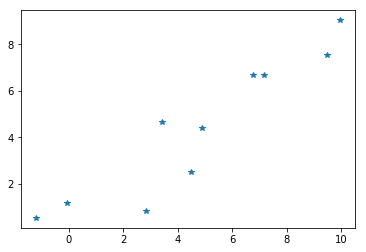

In [56]:
plt.plot(x_data, y_label, '*')
plt.show()

In [57]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [63]:
error = 0
for x, y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [64]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [65]:
init = tf.global_variables_initializer()

In [71]:
with tf.Session() as sess:
    sess.run(init)
    
    training_step = 10000
    for i in range(training_step):
        sess.run(train)
    
    final_slope, final_intercept = sess.run([m, b])

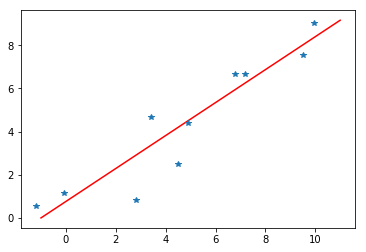

In [72]:
x_test = np.linspace(-1, 11, 10)

y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')
plt.show()